In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Candidate3.csv")
data.head()

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,pt2,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2
0,163286,109060857,37.5667,2.2892,2.0526,-1,EE,0.0251,0.0090,0.0000,...,45.4315,1.4706,-1.1630,1,EB,0.0008,0.000,0.0000,1.0190,0.0000
1,163286,109275715,36.2901,-0.8373,-1.5859,1,EB,0.0078,0.0438,0.0000,...,60.5754,-0.4896,1.0496,-1,EB,0.0112,0.000,0.7185,1.8461,0.0000
2,163286,109075352,25.9705,-0.6974,1.6360,-1,EB,0.0097,0.0407,6.2870,...,45.2954,-2.0401,3.1187,1,EE,0.0260,0.028,15.2170,4.5337,3.8370
3,163286,109169766,41.0075,1.4619,-0.5325,1,EB,0.0088,0.0000,0.0000,...,45.9013,1.1561,2.4786,-1,EB,0.0086,0.000,0.0000,2.4388,0.5676
4,163286,108947653,39.8985,-0.5927,-2.3947,1,EB,0.0153,0.0000,2.5435,...,34.8931,-2.2444,0.6106,-1,EE,0.0290,0.000,12.4229,0.4534,0.9096


In [3]:
invariant_mass = np.sqrt(2*data.pt1*data.pt2*(np.cosh(data.eta1 - data.eta2) - np.cos(data.phi1 - data.phi2)))

In [4]:
print(invariant_mass)

0        89.590677
1        92.252203
2        67.859050
3        87.604679
4       101.424147
           ...    
9995    108.001726
9996     89.655188
9997     85.123598
9998     90.427261
9999     82.893701
Length: 10000, dtype: float64


In [5]:
dataset = data.assign(M=invariant_mass)
dataset.head()

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2,M
0,163286,109060857,37.5667,2.2892,2.0526,-1,EE,0.0251,0.0090,0.0000,...,1.4706,-1.1630,1,EB,0.0008,0.000,0.0000,1.0190,0.0000,89.590677
1,163286,109275715,36.2901,-0.8373,-1.5859,1,EB,0.0078,0.0438,0.0000,...,-0.4896,1.0496,-1,EB,0.0112,0.000,0.7185,1.8461,0.0000,92.252203
2,163286,109075352,25.9705,-0.6974,1.6360,-1,EB,0.0097,0.0407,6.2870,...,-2.0401,3.1187,1,EE,0.0260,0.028,15.2170,4.5337,3.8370,67.859050
3,163286,109169766,41.0075,1.4619,-0.5325,1,EB,0.0088,0.0000,0.0000,...,1.1561,2.4786,-1,EB,0.0086,0.000,0.0000,2.4388,0.5676,87.604679
4,163286,108947653,39.8985,-0.5927,-2.3947,1,EB,0.0153,0.0000,2.5435,...,-2.2444,0.6106,-1,EE,0.0290,0.000,12.4229,0.4534,0.9096,101.424147


In [6]:
dataset.M.describe()

count    10000.000000
mean        88.891413
std         12.125822
min         60.001986
25%         82.804464
50%         89.864602
75%         94.016654
max        119.967439
Name: M, dtype: float64

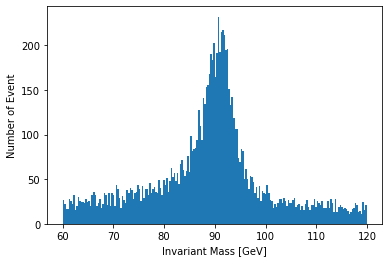

In [12]:
plt.hist(dataset.M, bins=200)
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Number of Event")
plt.show()

In [13]:
newdata = dataset[(dataset.M >= 85) & (dataset.M <= 97)]
print(newdata.M)

0       89.590677
1       92.252203
3       87.604679
11      85.501235
12      94.537894
          ...    
9992    95.749101
9993    96.616015
9996    89.655188
9997    85.123598
9998    90.427261
Name: M, Length: 5241, dtype: float64


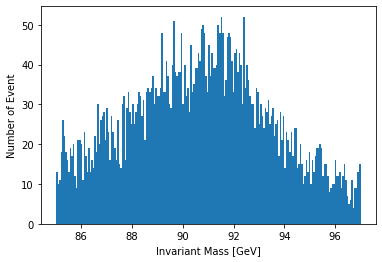

In [15]:
plt.hist(newdata.M, bins=200)
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Number of Event")
plt.show()

In [16]:
newdata.M.describe()

count    5241.000000
mean       90.708530
std         2.824142
min        85.017028
25%        88.637601
50%        90.764686
75%        92.646839
max        96.998437
Name: M, dtype: float64

In [17]:
se = np.std(newdata.M)/np.sqrt(newdata.shape[0])
se

0.03900658812870082

ได้
mean = 90.708530, 
Standard Deviation = 2.824142, 
Standard Error = $ \frac{Standard Deviation}{\sqrt(n)} $ = 0.039006

เพราะฉะนั้น อนุภาคที่พบ คือ Z Boson เพราะมีมวลใกล้เคียงกับค่าจริงซึ่งคือ 91.177 GeV